# 01. Linear Regression

**Author:** [Your Name/GitHub Username]
**Date:** June 2, 2025 (Or current date)

## Introduction

Linear Regression is one of the simplest and most fundamental supervised machine learning algorithms used for predicting a **continuous** target variable based on one or more input features.

* **Type:** Supervised Learning
* **Task:** Regression
* **Goal:** To find the best-fitting straight line (or hyperplane in higher dimensions) that describes the linear relationship between the input features (independent variables) and the output target (dependent variable).

## Theoretical Background

### Key Concepts

* **Dependent Variable (Target, $y$):** The variable we are trying to predict.
* **Independent Variable(s) (Features, $X$):** The variable(s) used to predict the dependent variable.
* **Hypothesis Function ($h_{\theta}(x)$):** The linear model that maps input features to predicted output.
    * For a single feature (Simple Linear Regression): $h_{\theta}(x) = \theta_0 + \theta_1 x$
    * For multiple features (Multiple Linear Regression): $h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n = \theta^T X$
    * $\theta_0$: Intercept (or bias) term.
    * $\theta_1, \theta_2, ..., \theta_n$: Coefficients (or weights) for each feature.
* **Cost Function (Loss Function, $J(\theta)$):** Measures how well the model is performing. The most common one for Linear Regression is the **Mean Squared Error (MSE)**.
    $J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$
    where $m$ is the number of training examples. The goal is to minimize this cost function.
* **Gradient Descent:** An iterative optimization algorithm used to find the values of $\theta$ that minimize the cost function. It updates the parameters in the opposite direction of the gradient of the cost function.
    $\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$
    where $\alpha$ is the learning rate.
    (Scikit-learn handles this optimization internally for its `LinearRegression` model, often using Ordinary Least Squares).

### Ordinary Least Squares (OLS)
For `sklearn.linear_model.LinearRegression`, the model is typically fitted by solving the OLS problem. OLS aims to minimize the sum of the squares of the differences between the observed dependent variable and those predicted by the linear function. The coefficients $\theta$ can be found analytically using the formula:
$\theta = (X^T X)^{-1} X^T y$

### Assumptions of Linear Regression
1.  **Linearity:** The relationship between the independent and dependent variables is linear.
2.  **Independence:** The residuals (errors) are independent of each other.
3.  **Homoscedasticity:** The residuals have constant variance at every level of x (i.e., errors are spread out consistently).
4.  **Normality:** The residuals are normally distributed.
5.  **No or little multicollinearity:** The independent variables are not too highly correlated with each other (for multiple linear regression).

### Pros
* Simple to understand and interpret.
* Computationally inexpensive.
* Provides a good baseline model.
* Coefficients can provide insights into the relationship between features and the target.

### Cons
* Assumes a linear relationship, which may not always hold true.
* Sensitive to outliers.
* May suffer from multicollinearity.
* Performance might be poor if assumptions are violated.

### Common Use Cases
* Predicting house prices based on features like size, location, etc.
* Forecasting sales based on advertising spend.
* Estimating crop yields based on rainfall and temperature.
* Analyzing the impact of different factors on economic growth.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Set a style for seaborn plots
sns.set_style('whitegrid')

## Implementation with Python

For this demonstration, we will use synthetic data generated by `sklearn.datasets.make_regression`. This allows us to control the characteristics of our dataset.

In [3]:
from sklearn.datasets import make_regression

# Generate synthetic data for regression
# We'll create a dataset with 1 feature for simple linear regression visualization
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Convert X to a Pandas DataFrame for easier handling (optional, but good practice)
# If X has multiple features, you can name them like X_df = pd.DataFrame(X, columns=['Feature1', 'Feature2', ...])
X_df = pd.DataFrame(X, columns=['Feature'])
y_s = pd.Series(y, name='Target') # Convert y to a Pandas Series

# Display the first few rows of the feature and target
print("Features (X):")
print(X_df.head())
print("\nTarget (y):")
print(y_s.head())

# Basic statistics
print("\nFeatures Description:")
print(X_df.describe())
print("\nTarget Description:")
print(y_s.describe())

Features (X):
    Feature
0  0.931280
1  0.087047
2 -1.057711
3  0.314247
4 -0.479174

Target (y):
0    50.779929
1   -10.065270
2   -34.918392
3    10.526743
4   -17.738377
Name: Target, dtype: float64

Features Description:
          Feature
count  100.000000
mean    -0.103847
std      0.908168
min     -2.619745
25%     -0.600906
50%     -0.126956
75%      0.405952
max      1.852278

Target Description:
count    100.000000
mean      -3.449530
std       41.321720
min     -118.027454
25%      -30.170786
50%       -0.634702
75%       23.478589
max       89.033145
Name: Target, dtype: float64


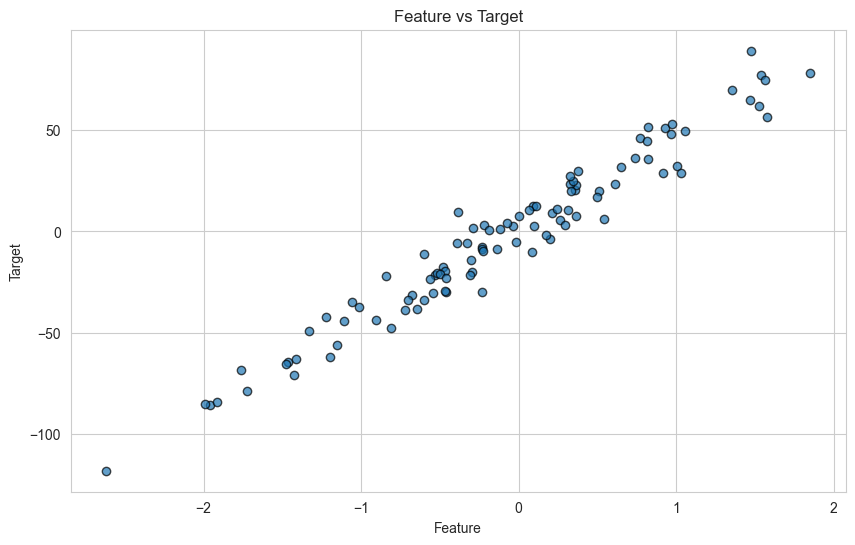

In [4]:
# Visualize the relationship between the feature and the target
plt.figure(figsize=(10, 6))
plt.scatter(X_df['Feature'], y_s, alpha=0.7, edgecolors='k')
plt.title('Feature vs Target')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

The scatter plot shows a clear positive linear trend between the feature and the target, suggesting that Linear Regression could be a suitable model.

In [5]:
# Split the data into training and testing sets
# For this simple example with one feature, X_df directly works.
# If you had multiple features, X would be your DataFrame of features.
X_train, X_test, y_train, y_test = train_test_split(X_df, y_s, test_size=0.2, random_state=42)

print(f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set size: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Note: Feature scaling (e.g., StandardScaler) is not strictly necessary for simple linear regression
# with Ordinary Least Squares, but can be important for other algorithms or when using
# gradient descent based optimizers, especially if features are on very different scales.
# For now, we'll proceed without scaling.

Training set size: X_train: (80, 1), y_train: (80,)
Testing set size: X_test: (20, 1), y_test: (20,)


In [6]:
# Create a Linear Regression model instance
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


In [7]:
# Get the coefficients
# For simple linear regression (one feature), model.coef_ will have one value
# and model.intercept_ will be a scalar.
theta_1 = model.coef_[0]  # Coefficient for the feature
theta_0 = model.intercept_ # Intercept

print(f"Coefficient (Slope, θ1): {theta_1:.2f}")
print(f"Intercept (θ0): {theta_0:.2f}")
print(f"The learned linear equation is: y = {theta_0:.2f} + {theta_1:.2f} * X")

Coefficient (Slope, θ1): 44.24
Intercept (θ0): 0.10
The learned linear equation is: y = 0.10 + 44.24 * X


In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Display some predictions vs actual values
predictions_df = pd.DataFrame({'Actual Target': y_test, 'Predicted Target': y_pred})
print("\nActual vs Predicted values (first 5):")
print(predictions_df.head())


Actual vs Predicted values (first 5):
    Actual Target  Predicted Target
83     -48.949080        -58.665283
53      89.033145         65.487436
70      44.409196         36.048763
45      -5.911314        -17.249282
44      -7.624431        -10.260702


### Interpreting the Metrics:
* **MAE (Mean Absolute Error):** The average absolute difference between the actual and predicted values. An MAE of [insert MAE value] means our predictions are, on average, [insert MAE value] units away from the actual values.
* **MSE (Mean Squared Error):** The average of the squared differences between actual and predicted values. Squaring penalizes larger errors more.
* **RMSE (Root Mean Squared Error):** The square root of MSE. It's in the same units as the target variable, making it more interpretable than MSE. An RMSE of [insert RMSE value] has a similar interpretation to MAE.
* **R-squared (R²):** The proportion of the variance in the dependent variable that is predictable from the independent variable(s). An R² of [insert R2 value] means that approximately [insert R2 value * 100]% of the variability in our target variable can be explained by our feature(s) using this linear model. Values range from 0 to 1 (higher is generally better).

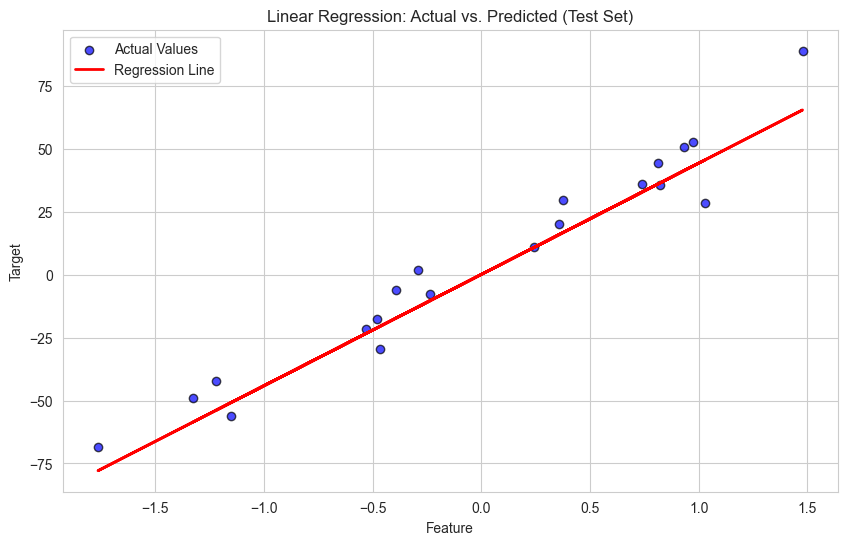

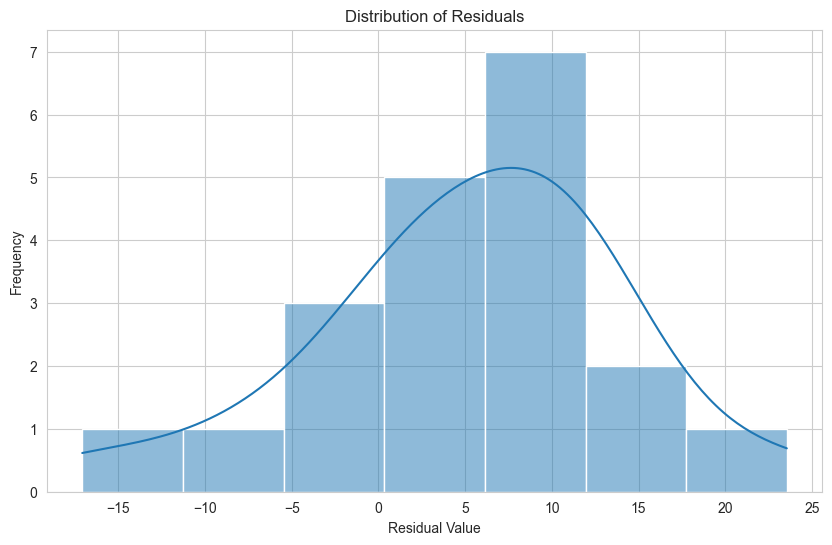

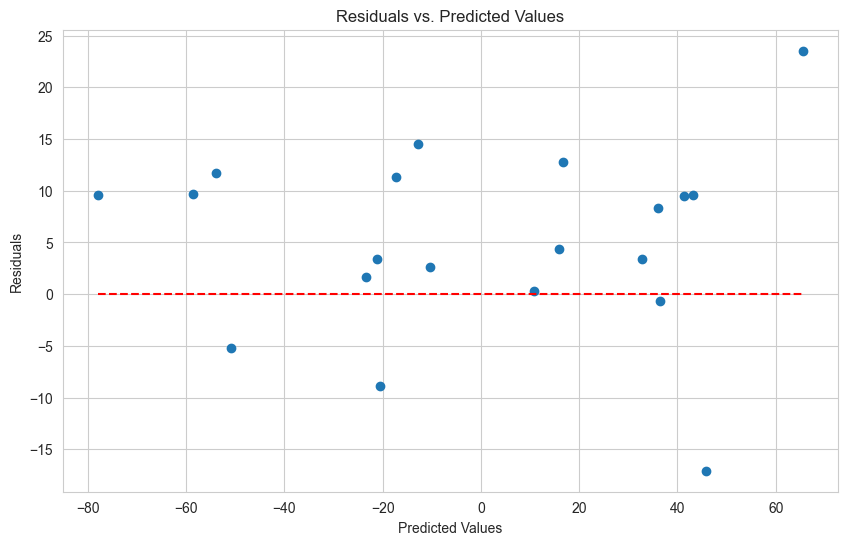

In [9]:
# Plot the regression line on the test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Feature'], y_test, color='blue', label='Actual Values', alpha=0.7, edgecolors='k')
plt.plot(X_test['Feature'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Actual vs. Predicted (Test Set)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Plotting residuals (optional but good for checking assumptions)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

The first plot shows our regression line fitting the test data points. The line represents the predictions made by our model.

The distribution of residuals appears somewhat normal, centered around zero, which is a good sign.
The residuals vs. predicted values plot should ideally show no clear pattern (random scatter around the horizontal line at 0), suggesting homoscedasticity.

## Hyperparameter Tuning

Standard `sklearn.linear_model.LinearRegression` doesn't have many traditional hyperparameters to tune for model performance in the same way as algorithms like SVM or Random Forests. The fitting process (OLS) is deterministic.

However, variations of Linear Regression introduce regularization, which *does* involve hyperparameters:
* **Ridge Regression (`sklearn.linear_model.Ridge`):** Adds L2 regularization. Hyperparameter: `alpha` (strength of regularization).
* **Lasso Regression (`sklearn.linear_model.Lasso`):** Adds L1 regularization (can lead to feature selection). Hyperparameter: `alpha`.
* **ElasticNet Regression (`sklearn.linear_model.ElasticNet`):** Combines L1 and L2 regularization. Hyperparameters: `alpha` and `l1_ratio`.

These are useful when dealing with multicollinearity or when you want to prevent overfitting by penalizing large coefficient values. For basic Linear Regression, the "tuning" is more about feature selection, feature engineering, and ensuring assumptions are met.

## Conclusion & Key Takeaways

* Linear Regression provides a simple yet powerful way to model linear relationships.
* We successfully implemented a simple linear regression model on synthetic data, trained it, and evaluated its performance.
* The model's coefficients ($\theta_0$ and $\theta_1$) define the best-fit line.
* Evaluation metrics like MAE, MSE, RMSE, and R² help us understand how well the model performs.
* Visualizing the data, the regression line, and residuals is crucial for understanding the model and checking its assumptions.
* While basic Linear Regression has few tunable hyperparameters, its regularized variants (Ridge, Lasso, ElasticNet) offer more control, especially for complex datasets.

## Further Reading/References (Optional)

* [Scikit-learn LinearRegression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [StatQuest: Linear Regression, Clearly Explained](https://www.youtube.com/watch?v=nk2CQITm_eo)
* Elements of Statistical Learning (Chapter 3) - Hastie, Tibshirani, Friedman